# Homework 1 DSCI 552
 **Name: DORIS FANG**  
 **USC ID: 6287-5035-14**

In [1]:
### import some package that I need to use later:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
import math

import os
os.getcwd()

'/Users/dorisfang/Desktop/552/hw/homework-1-doris07/notebook'

## **1. Vertebral Column Data Set**

#### **(a) Download the Vertebral Column Data Set from:**

In [2]:
os.chdir("..")
os.getcwd()

'/Users/dorisfang/Desktop/552/hw/homework-1-doris07'

In [3]:
header = ["pelvic incidence", "pelvic tilt", 
          "lumbar lordosis angle", "sacral slope", 
          "pelvic radius", "grade of spondylolisthesi", "class label"]
df = pd.read_csv('./hw1_Data/vertebral_column_data/column_2C.dat',
                 header=None, sep=' ', names = header)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pelvic incidence           310 non-null    float64
 1   pelvic tilt                310 non-null    float64
 2   lumbar lordosis angle      310 non-null    float64
 3   sacral slope               310 non-null    float64
 4   pelvic radius              310 non-null    float64
 5   grade of spondylolisthesi  310 non-null    float64
 6   class label                310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
df.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesi,class label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [6]:
df.tail()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesi,class label
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO
309,33.84,5.07,36.64,28.77,123.95,-0.20,NO


 As the information above, this Vertebral Column Data Set has 310 rows and 7 columns. From columns_2c.dat, the class label includes Normal (NO) and Abnormal (AB).

#### **(b) Pre-Processing and Exploratory data analysis:**

   *i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1. NO= 0, AB= 1*

In [7]:
#Change the class label variables into 0 and 1:
df['class label'] = df['class label'].map(lambda v:0 
                                          if v == 'NO' 
                                          else 1)

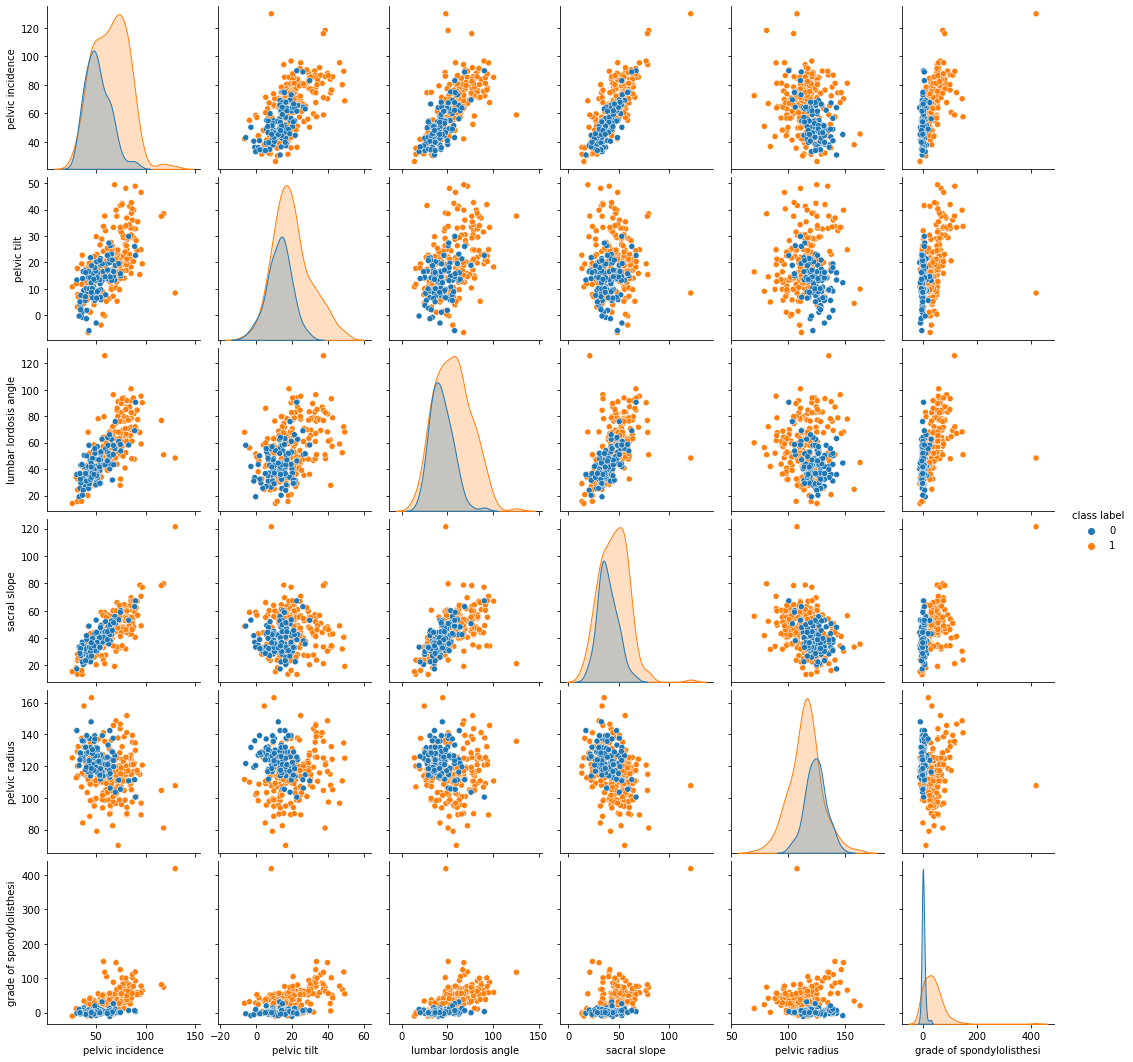

In [8]:
sns.pairplot(df, hue="class label", diag_kind="kde")

*ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).*

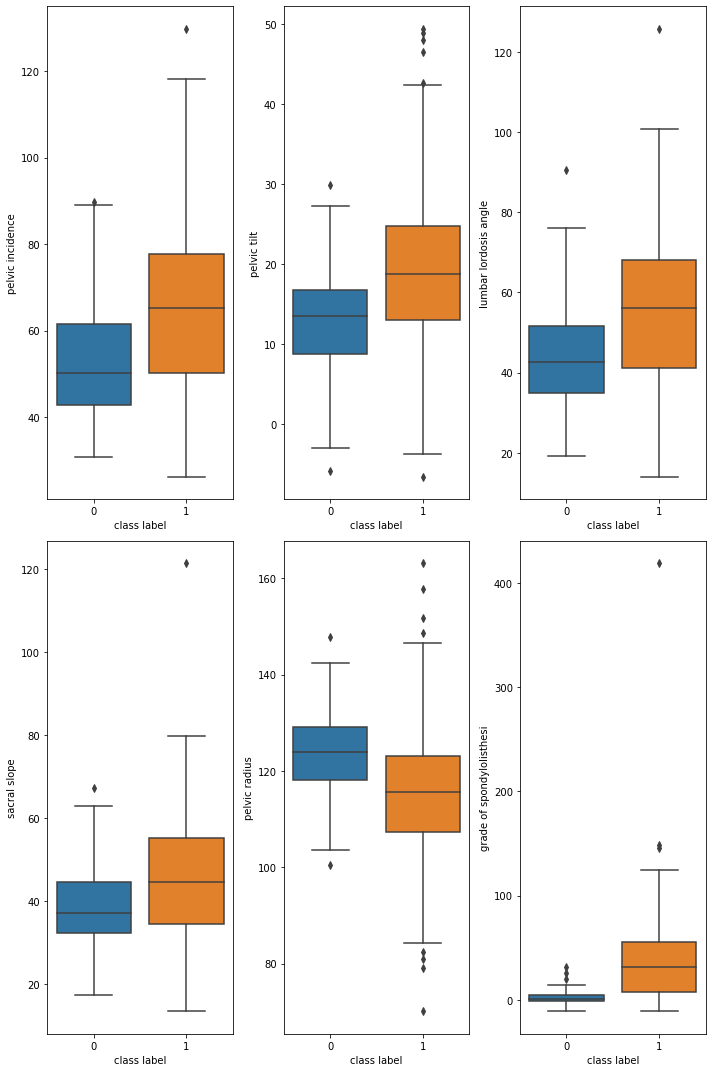

In [9]:
plt.figure(figsize=(10,15))

for i, col in enumerate(df.columns[:6], start=1):
    plt.subplot(2,3,i)
    sns.boxplot(x="class label", y=col,
                data=df)
    plt.ylabel(header[i-1])
plt.tight_layout()

*iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.*

In [10]:
training_set = pd.concat([df[df['class label']== 0 ].iloc[0:70,:],
                      df[df['class label'] == 1].iloc[0:140,]])
training_set.reset_index(drop=True, inplace =True)

print("Size of Training set is ",training_set.shape)

Size of Training set is  (210, 7)


In [11]:
test_set = pd.concat([df[df['class label']== 0].iloc[70:,:],
                     df[df['class label'] == 1].iloc[140:,:]],
                    ignore_index=True)
test_set.reset_index(drop=True, inplace =True)

print("Size of Test set is ", test_set.shape)

Size of Test set is  (100, 7)


#### (c) Classification using KNN on Vertebral Column Data Set

 *i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).*

In [12]:
#trainig set:
## Independent variable of training set:
X_training = training_set.drop('class label',axis = 1)
X_training = np.asarray(X_training)
## Dependent variable of training set:
y_training = np.array(training_set['class label'])

#test set:
## Independent variable of test set:
X_test = test_set.drop('class label', axis = 1)
X_test = np.asarray(X_test)
## Dependent variable of testing set:
y_test = np.array(test_set['class label'])

In [13]:
#To train the KNN and make predictions with it:
classifier = KNeighborsClassifier(n_neighbors=208,
                                  metric='euclidean')
classifier.fit(X_training,y_training)

KNeighborsClassifier(metric='euclidean', n_neighbors=208)

*ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of $k$ for $k ∈ $ {$ 208, 205, . . . , 7, 4, 1, $ } (in reverse order). You are welcome to use smaller increments of $k$. Which $k^∗$ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision,and F1-score when $k$ = $k^*$.*

In [14]:
#The mean error for the predicted values of training set:
training_error = []

#k values between 1 and 208:
k = np.arange(208, 0, -3)
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i,metric = 'euclidean')
    knn.fit(X_training, y_training)
    pred_i = knn.predict(X_training)
    training_error.append(np.mean(pred_i != y_training))

print("Minimum train error:",min(training_error),
      "at K =",208-3*training_error.index(min(training_error)))

#The mean error for the predicted values of test set:
test_error = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
    knn.fit(X_training, y_training)
    pred_i = knn.predict(X_test)
    test_error.append(np.mean(pred_i != y_test))
print("Minimum test error:",min(test_error),
      "at K =",208-3*test_error.index(min(test_error)))

Minimum train error: 0.0 at K = 1
Minimum test error: 0.06 at K = 4


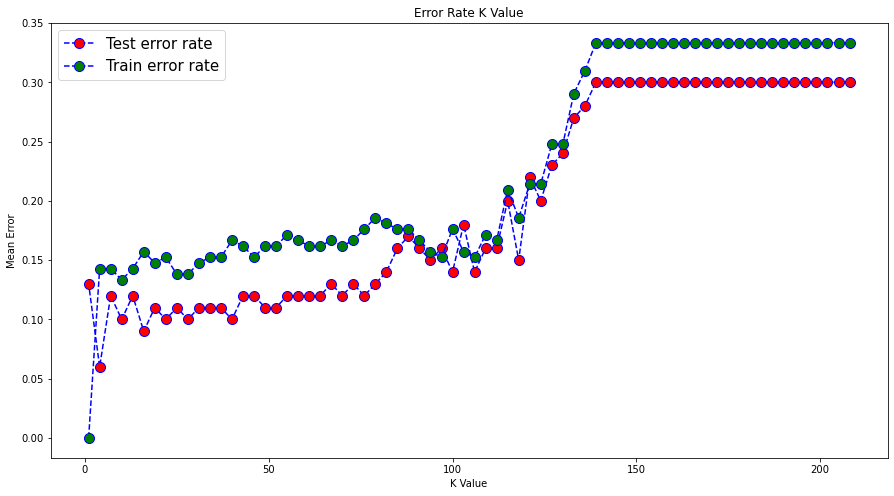

In [15]:
#Plot the error values against k values
plt.figure(figsize=(15, 8))
plt.plot(k, test_error, color='blue', 
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10,
        label='Test error rate')
plt.plot(k, training_error, color='blue', 
         linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10,
        label='Train error rate')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.legend(prop={'size': 15})

In [16]:
#The confusion matrix
classifier = KNeighborsClassifier(n_neighbors=4,
                                  metric='euclidean')
classifier.fit(X_training,y_training)
y_pred = classifier.predict(X_test)
print("Confusion matrix is \n",confusion_matrix(y_test, y_pred))

print("Classification report is \n",classification_report(y_test, y_pred))

#Assign TN, FP,FN,TP:
tn,fp,fn,tp = confusion_matrix(y_test, y_pred).flatten()

#True positive rate: (TP +FN)=P; TP/(TP+FN)=TPR
TPR = tp/(tp+fn)
print( "True positive rate is ",TPR)

#True negative rate: (FP+TN)=N;TN/(FP +TN)=TNR
TNR = tn /(fp+tn)
print( "True negative rate is ",TNR)

#Precision: TP/(TP+FP):
precision = tp /(tp+fp)
print( "Precision is ",precision)


#F1-score when k = 4
print("When k=4, F1-score is ", f1_score(y_test, y_pred))

Confusion matrix is 
 [[25  5]
 [ 1 69]]
Classification report is 
               precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

True positive rate is  0.9857142857142858
True negative rate is  0.8333333333333334
Precision is  0.9324324324324325
When k=4, F1-score is  0.9583333333333333


*iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,which is obtained by some value of $k$, against the size of training set, when the size of training set is $N$ ∈ { $10,20,30,...,210 $}. Note: for each $N$, select $N − ⌊N/3⌋$ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal $k$ from a set starting from $k = 1$, increasing by $5$. For example, if $N = 200$, the optimal $k$ is selected from {$1,6,11,...,196$ }. This plot is called a Learning Curve.* 

Text(0, 0.5, 'Error Rate')

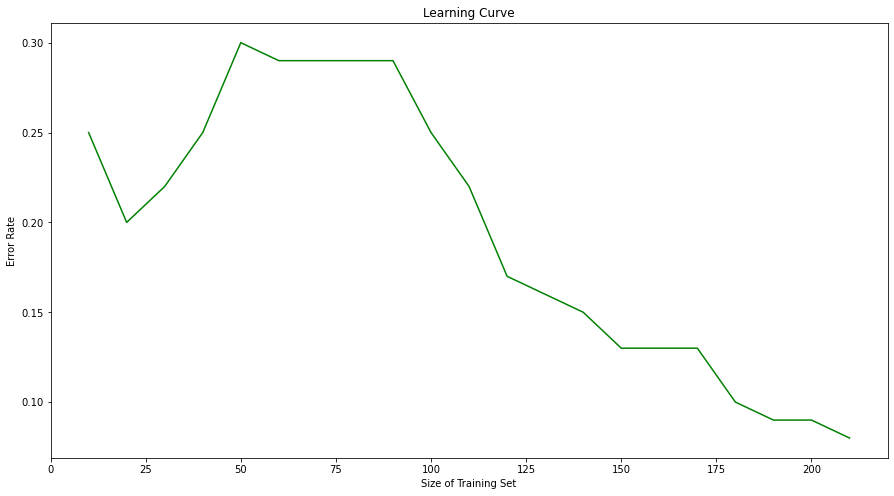

In [17]:
#Select set size N
trainingset_size = np.arange(10, 211, 10)
best_error = [ ]
for N in trainingset_size:
    trainingset_sizeN=pd.concat([df[df['class label']== 0 ].iloc[0:N//3,:],
                                df[df['class label'] == 1].iloc[0:N-N//3,:]],
                                ignore_index=True)
    alternative_N_k = np.arange(1,N,5)
    X_trainingset = trainingset_sizeN.iloc[:, :-1]
    Y_trainingset = trainingset_sizeN.iloc[:, -1]
    X_trainingset_Test = test_set.iloc[:, :-1]
    Y_trainingset_Test = test_set.iloc[:, -1]
    N_error = []
    for k in alternative_N_k:
        classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
        classifier.fit(X_trainingset, Y_trainingset)
        pred_i = classifier.predict(X_trainingset_Test)
        N_error.append(np.mean(pred_i != Y_trainingset_Test))
    best_error.append((min(N_error)))
#Plot learning curve
plt.figure(figsize=(15, 8))
plt.plot(trainingset_size, best_error, color='g', linestyle='solid')
plt.title('Learning Curve')
plt.xlabel('Size of Training Set')
plt.ylabel('Error Rate')

#### (d)  Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when $k = k^∗$) in a table. Use all of your training data and select the best $k$ when {$1,6,11,...,196$}.

*i. Minkowski Distance:*

In [18]:
k = np.arange(1, 200, 5)
manhattan_error = [ ]
optional_k = []
for i in k:
        classifier = KNeighborsClassifier(n_neighbors=i, metric='minkowski')
        classifier.fit(X_training, y_training)
        pred_i = classifier.predict(X_test)
        manhattan_error.append(np.mean(pred_i !=y_test))
    
min_error=[i for i, x in enumerate(manhattan_error) if x==min(manhattan_error)]
#The best k value:
best_k = [i * 5 +1 for i in min_error]
print( "The best k in Minkowski Distance is", best_k)

The best k in Minkowski Distance is [6]


  *A. which becomes Manhattan Distance with $p = 1$.*

In [24]:
k = np.arange(1, 200, 5)
manhattan_error = [ ]
optional_k = []
for i in k:
        classifier = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=1)
        classifier.fit(X_training, y_training)
        pred_i = classifier.predict(X_test)
        manhattan_error.append(np.mean(pred_i !=y_test))
    
min_error=[i for i, x in enumerate(manhattan_error) if x==min(manhattan_error)]
#The best k value:
best_k = [i * 5 +1 for i in min_error]
best_k
print("The best k in Manhattan Distance with p=1", best_k)

The best k in  Manhattan Distance with p=1 [6, 11, 26]


*B. with $log_{10} (p)$ ∈ {0.1,0.2,0.3,...,1}. In this case, use the $k^∗$ you found for the Manhattan distance in 1(d)iA. What is the best $log_{10} (p)$?*

In [39]:
p_list = np.arange(0.1, 1.1, 0.1)
p = 10**p_list
log_error = [ ]
for i in p:
        classifier = KNeighborsClassifier(n_neighbors=6,p=i)
        classifier.fit(X_training, y_training)
        pred_i = classifier.predict(X_test)
        log_error.append(np.mean(pred_i !=y_test))

log_error1=pd.DataFrame(log_error)
min_index=[i for i, x in enumerate(log_error1[0]) if x==min(log_error1[0])]


print("When k=6,the best log10(p) is",p_list[min_index], 
      "where p =", 10**p_list[min_index],
     ", and the minimum error is", min(log_error1))

When k=6,the best log10(p) is [0.6] where p = [3.98107171] , and the minimum error is 0


In [40]:
p_list = np.arange(0.1, 1.1, 0.1)
p = 10**p_list
log_error = [ ]
for i in p:
        classifier = KNeighborsClassifier(n_neighbors=11,p=i)
        classifier.fit(X_training, y_training)
        pred_i = classifier.predict(X_test)
        log_error.append(np.mean(pred_i !=y_test))

log_error1=pd.DataFrame(log_error)
min_index=[i for i, x in enumerate(log_error1[0]) if x==min(log_error1[0])]


print("When k=11, the best log10(p) is",p_list[min_index], 
      "where p =", 10**p_list[min_index],
     ", and the minimum error is", min(log_error1))

When k=11, the best log10(p) is [0.1 0.2 0.8 0.9 1. ] where p = [ 1.25892541  1.58489319  6.30957344  7.94328235 10.        ] , and the minimum error is 0


In [41]:
p_list = np.arange(0.1, 1.1, 0.1)
p = 10**p_list
log_error = [ ]
for i in p:
        classifier = KNeighborsClassifier(n_neighbors=26,p=i)
        classifier.fit(X_training, y_training)
        pred_i = classifier.predict(X_test)
        log_error.append(np.mean(pred_i !=y_test))

log_error1=pd.DataFrame(log_error)
min_index=[i for i, x in enumerate(log_error1[0]) if x==min(log_error1[0])]


print("When k = 26, the best log10(p) is",p_list[min_index], 
      "where p =", 10**p_list[min_index],
     ", and the minimum error is", min(log_error1))

When k = 26, the best log10(p) is [0.1 0.2 0.4 0.6] where p = [1.25892541 1.58489319 2.51188643 3.98107171] , and the minimum error is 0


*C. which becomes Chebyshev Distance with $p → ∞$*

In [192]:
Chebyshev_k = np.arange(1, 200, 5)
Chebyshev_error = [ ]
for k in Chebyshev_k:
        classifier = KNeighborsClassifier(n_neighbors=k,p=float('INF'))
        classifier.fit(X_training, y_training)
        pred_i = classifier.predict(X_test)
        Chebyshev_error.append(np.mean(pred_i != y_test))
print("In Chebyshev Distance with p close to infinite, the best k is",
      Chebyshev_error.index(min(Chebyshev_error))*5+1, 
      "which the minimum error is", min(Chebyshev_error) )

In Chebyshev Distance with p close to infinite, the best k is 16 which the minimum error is 0.08


**ii. Mahalanobis Distance.** 

In [177]:
Mahalanobis_error = [ ]

Mahalanobis_k = np.arange(1, 200, 5)
for k in Mahalanobis_k:
        classifier = KNeighborsClassifier(n_neighbors=k,metric='mahalanobis',
                                          metric_params={'V': np.cov(X_training)}, algorithm="brute")
        classifier.fit(X_training, y_training)
        pred_i = classifier.predict(X_test)
        Mahalanobis_error.append(np.mean(pred_i !=y_test))

/Users/dorisfang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/Users/dorisfang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/Users/dorisfang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/Users/dorisfang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
 

/Users/dorisfang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/Users/dorisfang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(


In [180]:
print("The best k with Mahalanobis Distance is", Mahalanobis_error.index(min(Test_Ma_error))*5+1)

The best k with Mahalanobis Distance is 6


**(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when  $k$ $∈$ {$1,6,11,16,...,196$}.**

In [181]:
#Euclidean
weighted_error1 = []
#Build k between 1 and 196: 
k_weighted = np.arange(1,200,5)
for i in k_weighted:
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean',weights='distance')
    knn.fit(X_training, y_training)
    pred_i = knn.predict(X_test)
    weighted_error1.append(np.mean(pred_i != y_test))

##Manhattan
weighted_error2 = []
#Build k between 1 and 196: 
k_weighted = np.arange(1,200,5)
for i in k_weighted:
    knn = KNeighborsClassifier(n_neighbors=i,metric='manhattan',weights='distance')
    knn.fit(X_training, y_training)
    pred_i = knn.predict(X_test)
    weighted_error2.append(np.mean(pred_i != y_test))

##Chebyshev
weighted_error3 = []
#Build k between 1 and 196: 
k_weighted = np.arange(1,200,5)
for i in k_weighted:
    knn = KNeighborsClassifier(n_neighbors=i,metric='chebyshev',weights='distance')
    knn.fit(X_training, y_training)
    pred_i = knn.predict(X_test)
    weighted_error3.append(np.mean(pred_i != y_test))

###Table: 
tb1={"Distance Type":["Euclidean","Manhattan","Chebyshev"],
    "Minimum Error":[min(weighted_error1),min(weighted_error2),min(weighted_error3)],
    "Best k":[weighted_error1.index(min(weighted_error1))*5+1,
              weighted_error2.index(min(weighted_error2))*5+1,
              weighted_error3.index(min(weighted_error3))*5+1]
   }
pd.DataFrame(data=tb1)

,Distance Type,Minimum Error,Best k
0,Euclidean,0.10,6
1,Manhattan,0.10,26
2,Chebyshev,0.11,16


#### (f) What is the lowest training error rate you achieved in this homework?

Based on what I found above, I would like to say the lowest training data error rate is 0.0.